In [1]:
#import the package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.feature_selection import f_regression
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn import metrics

In [2]:
#import the dataset
housing_data = pd.read_csv('housing.csv')
housing_data

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,37,7937,OneFam,SLvl,Above_Average,1984,Typical,1003,1003,0,1,0,3,1,0,-93.604776,41.988964,142500
2409,0,8885,OneFam,One_Story,Average,1983,Typical,864,902,0,1,0,2,1,0,-93.602680,41.988314,131000
2410,62,10441,OneFam,SFoyer,Average,1992,Typical,912,970,0,1,0,3,1,0,-93.606847,41.986510,132000
2411,77,10010,OneFam,One_Story,Average,1974,Typical,1389,1389,0,1,0,2,1,1,-93.600190,41.990921,170000


In [3]:
#split the data into Independent and dependent variables
x = housing_data.iloc[:,:-1]
y = housing_data.iloc[:,-1]

In [4]:
x.head(4)


,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245


In [5]:
y.head(4)

0    215000
1    105000
2    172000
3    244000
Name: Sale_Price, dtype: int64

In [6]:
# Set the random seed based on student number
student_number = 22207406
np.random.seed(student_number)

In [7]:
#train-test splitting of the housing_data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=student_number)

### EDA (Exploratory Data Analysis)

In [8]:
#join the x_train and y_train for the EDA analysis
x_y_train=pd.concat([x_train, y_train], axis=1)
x_y_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
1017,24,2645,Twnhs,Two_Story,Average,1999,Typical,960,962,645,2,1,3,1,0,-93.641770,42.047171,200000
266,100,15602,OneFam,One_Story,Very_Good,1959,Typical,1501,1801,0,2,0,1,1,2,-93.641677,42.010797,289000
437,98,12203,OneFam,Two_Story,Average,1998,Typical,1225,1276,1336,2,1,4,1,1,-93.652380,42.053041,336000
2079,24,2544,Twnhs,Two_Story,Average,2005,Typical,600,520,623,2,1,2,1,0,-93.644891,42.047642,147400
81,88,11134,OneFam,Two_Story,Average,1992,Typical,1390,1402,823,2,1,4,1,1,-93.652773,42.045773,285000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,60,7200,OneFam,Two_and_Half_Unf,Good,1920,Typical,530,581,530,1,0,3,1,0,-93.626377,42.023839,101000
269,50,9140,OneFam,One_and_Half_Fin,Average,1921,Typical,629,727,380,1,0,2,1,0,-93.626689,42.021474,110000
2296,79,9236,OneFam,One_Story,Average,1997,Good,1479,1494,0,2,0,3,1,0,-93.692221,42.018123,217000
175,50,10300,OneFam,Two_Story,Above_Average,1921,Typical,576,902,808,2,0,3,1,0,-93.623380,42.027986,140000


In [9]:
#Shape of data
x_y_train.shape

(1689, 18)

In [10]:
#Describe the data. It give the five-point summary data 
x_y_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot_Frontage,1689.0,55.471877,33.695097,0.000000,36.000000,62.000000,76.000000,313.000000
Lot_Area,1689.0,9950.253404,6720.666582,1300.000000,7415.000000,9350.000000,11423.000000,159000.000000
Year_Built,1689.0,1970.579633,29.347803,1872.000000,1954.000000,1972.000000,1999.000000,2010.000000
Total_Bsmt_SF,1689.0,1030.735938,416.433254,0.000000,784.000000,981.000000,1261.000000,3206.000000
First_Flr_SF,1689.0,1142.113677,369.882090,372.000000,872.000000,1073.000000,1361.000000,3820.000000
Second_Flr_SF,1689.0,340.602131,424.652187,0.000000,0.000000,0.000000,707.000000,1872.000000
Full_Bath,1689.0,1.552398,0.548378,0.000000,1.000000,2.000000,2.000000,4.000000
Half_Bath,1689.0,0.385435,0.504765,0.000000,0.000000,0.000000,1.000000,2.000000
Bedroom_AbvGr,1689.0,2.854352,0.808050,0.000000,2.000000,3.000000,3.000000,6.000000
Kitchen_AbvGr,1689.0,1.037300,0.192652,1.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
# Count the null value or missing values for each variable
missing_value = x_y_train.isnull().sum()  
missing_value

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

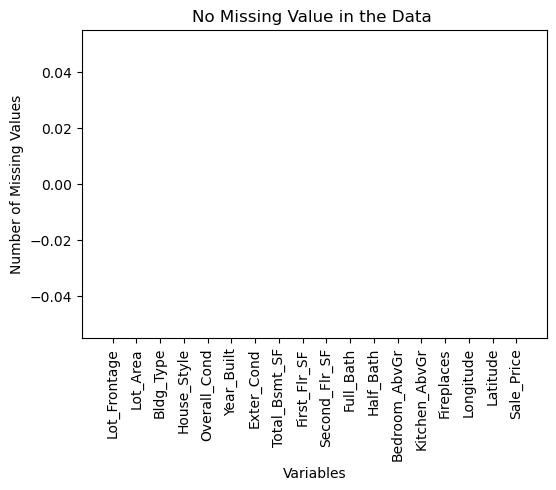

In [12]:
#Plot the Missing values 
plt.figure(figsize=(6, 4))
plt.bar(missing_value.index, missing_value.values)
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.title('No Missing Value in the Data ')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [13]:
#Checking the datatype of the data
x_y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 1017 to 1829
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   1689 non-null   int64  
 1   Lot_Area       1689 non-null   int64  
 2   Bldg_Type      1689 non-null   object 
 3   House_Style    1689 non-null   object 
 4   Overall_Cond   1689 non-null   object 
 5   Year_Built     1689 non-null   int64  
 6   Exter_Cond     1689 non-null   object 
 7   Total_Bsmt_SF  1689 non-null   int64  
 8   First_Flr_SF   1689 non-null   int64  
 9   Second_Flr_SF  1689 non-null   int64  
 10  Full_Bath      1689 non-null   int64  
 11  Half_Bath      1689 non-null   int64  
 12  Bedroom_AbvGr  1689 non-null   int64  
 13  Kitchen_AbvGr  1689 non-null   int64  
 14  Fireplaces     1689 non-null   int64  
 15  Longitude      1689 non-null   float64
 16  Latitude       1689 non-null   float64
 17  Sale_Price     1689 non-null   int64  
dtypes: fl

In [14]:
#Total unique_values in the features
unique_values = x_y_train.nunique()
unique_values

Lot_Frontage      115
Lot_Area         1233
Bldg_Type           5
House_Style         8
Overall_Cond        9
Year_Built        111
Exter_Cond          5
Total_Bsmt_SF     791
First_Flr_SF      819
Second_Flr_SF     457
Full_Bath           5
Half_Bath           3
Bedroom_AbvGr       7
Kitchen_AbvGr       3
Fireplaces          5
Longitude        1640
Latitude         1632
Sale_Price        659
dtype: int64

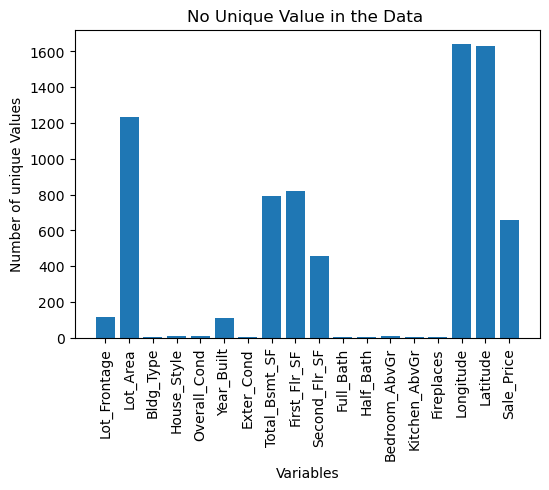

In [15]:
#Plot the bar graph of unique values
plt.figure(figsize=(6, 4))
plt.bar(unique_values.index, unique_values.values)
plt.xlabel('Variables')
plt.ylabel('Number of unique Values')
plt.title('No Unique Value in the Data ')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [16]:
#Describe Level of measurement 
ordinal_data = ["Overall_Cond", "Exter_Cond"]
nominal_data = ["Bldg_Type", "House_Style"]
Continous = ["Lot_Frontage","Lot_Area","Total_Bsmt_SF","First_Flr_SF","Second_Flr_SF","Longitude","Latitude"]
discrete =['Year_Built','Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Fireplaces']

In [17]:
#categorical_data and continous_data
categorical_data=[]
continous_data=[]
for column in x_y_train.columns:
    if x_y_train[column].dtype == 'object':
        categorical_data.append(column)
    else:
        continous_data.append(column)

In [18]:
categorical_data

['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']

In [19]:
continous_data

['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Fireplaces',
 'Longitude',
 'Latitude',
 'Sale_Price']

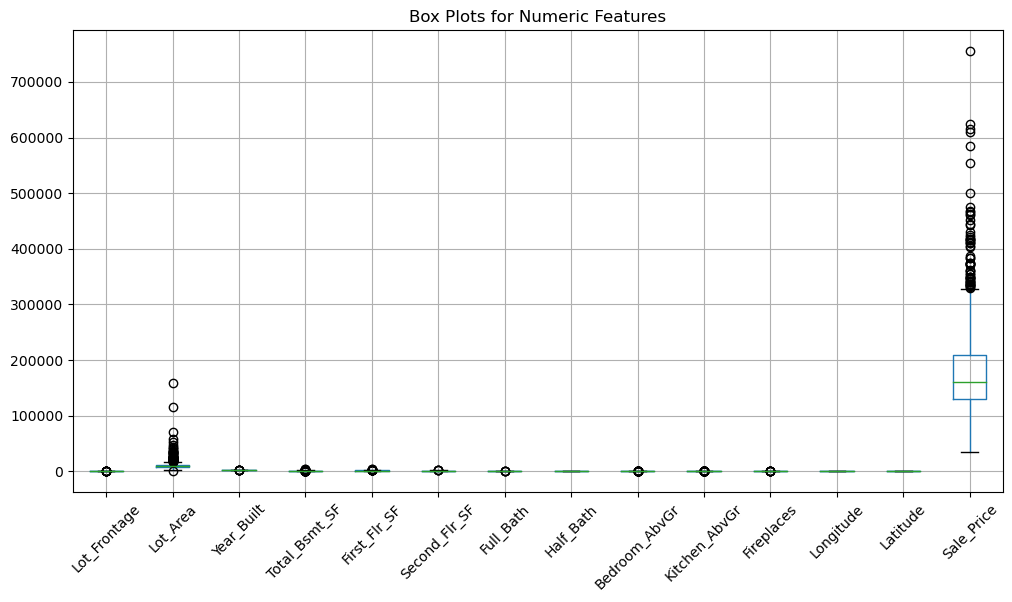

In [20]:
#Checking the outliers on continous_data
plt.figure(figsize=(12, 6))
x_y_train[continous_data].boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=45)
plt.show()

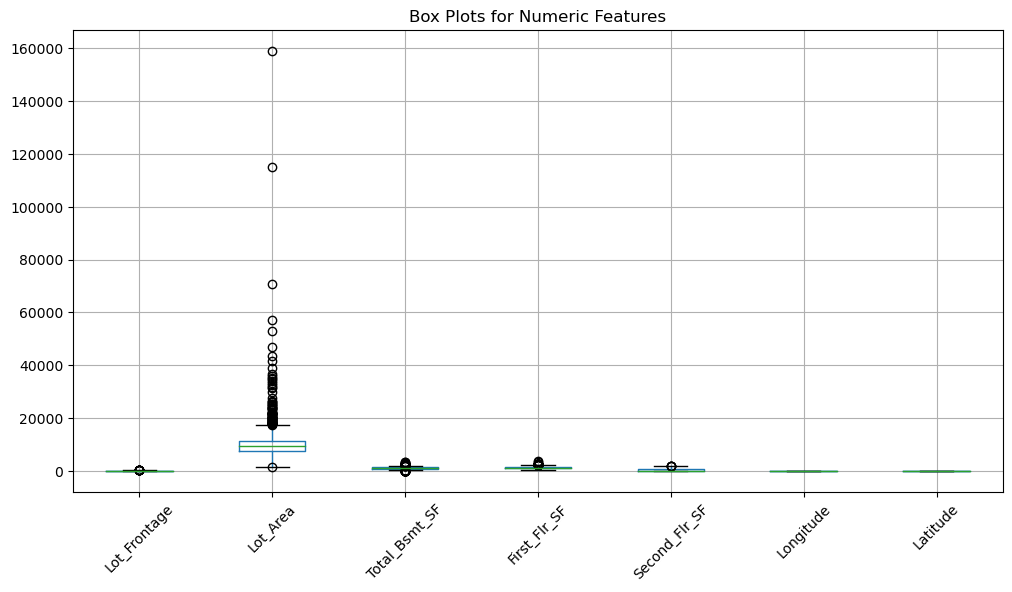

In [21]:
#Checking the outliers on Continous
plt.figure(figsize=(12, 6))
x_y_train[Continous].boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=45)
plt.show()

C:\Users\415vi\AppData\Local\Temp\ipykernel_2304\2657351757.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data.corr()


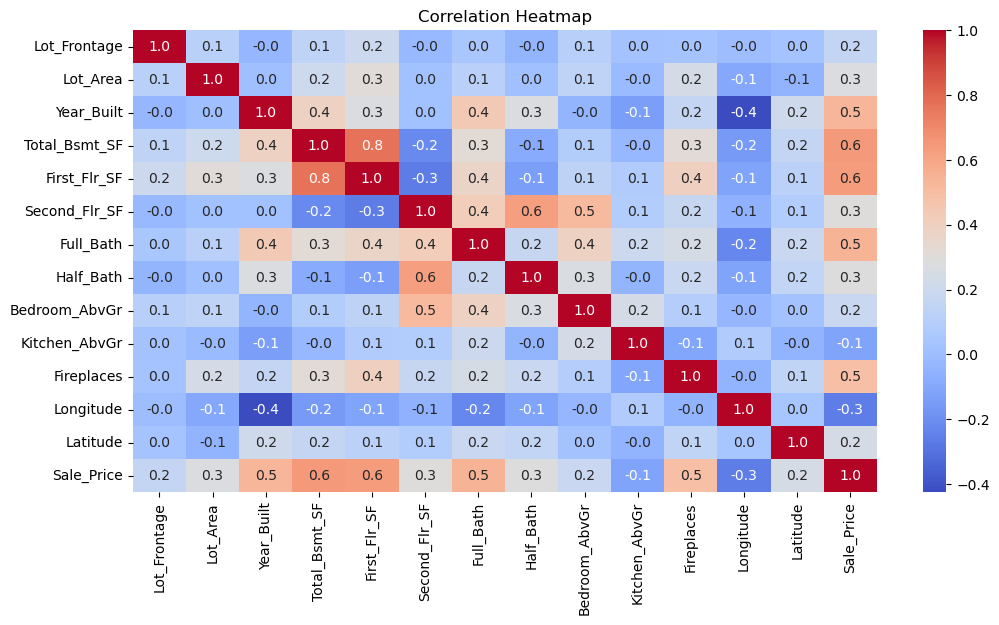

In [22]:
#Cheking the Correlation of the data
correlation_matrix = housing_data.corr()
plt.figure(figsize=(12, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

###  Data Preparation

In [23]:
#Encoding on categorical Features
# Initialize label encoder creating a object of labelEncoder le
le = LabelEncoder()

# Apply label encoding to each categorical column in both train and test data
for column in categorical_data:
    x_train[column] = le.fit_transform(x_train[column])
    x_test[column] = le.transform(x_test[column])

In [24]:
x_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
1017,24,2645,2,5,1,1999,4,960,962,645,2,1,3,1,0,-93.641770,42.047171
266,100,15602,1,0,7,1959,4,1501,1801,0,2,0,1,1,2,-93.641677,42.010797
437,98,12203,1,5,1,1998,4,1225,1276,1336,2,1,4,1,1,-93.652380,42.053041
2079,24,2544,2,5,1,2005,4,600,520,623,2,1,2,1,0,-93.644891,42.047642
81,88,11134,1,5,1,1992,4,1390,1402,823,2,1,4,1,1,-93.652773,42.045773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,60,7200,1,7,5,1920,4,530,581,530,1,0,3,1,0,-93.626377,42.023839
269,50,9140,1,1,1,1921,4,629,727,380,1,0,2,1,0,-93.626689,42.021474
2296,79,9236,1,0,1,1997,2,1479,1494,0,2,0,3,1,0,-93.692221,42.018123
175,50,10300,1,5,0,1921,4,576,902,808,2,0,3,1,0,-93.623380,42.027986


In [25]:
# Feature Scaling : Specify the data into the same level
#We can feature scaling in two ways either minmax scaler or Standard scaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_train = pd.DataFrame(x_train1, columns=x_train.columns, index=x_train.index)
x_test1 = sc.fit_transform(x_test)
x_test = pd.DataFrame(x_test1, columns=x_test.columns, index=x_test.index)

In [26]:
x_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
1017,-0.934296,-1.087305,1.113700,1.318261,-0.402146,0.968685,0.366389,-0.169912,-0.487093,0.717029,0.816471,1.217887,0.180300,-0.193671,-0.932234,0.059306,0.726412
266,1.321893,0.841199,-0.302745,-0.859074,2.561744,-0.394682,0.366389,1.129601,1.781869,-0.802311,0.816471,-0.763819,-2.295528,-0.193671,2.164212,0.062885,-1.285550
437,1.262520,0.335296,-0.302745,1.318261,-0.402146,0.934601,0.366389,0.466633,0.362077,2.344725,0.816471,1.217887,1.418214,-0.193671,0.615989,-0.348960,1.051101
2079,-0.934296,-1.102338,1.113700,1.318261,-0.402146,1.173190,0.366389,-1.034652,-1.682422,0.665207,0.816471,1.217887,-1.057614,-0.193671,-0.932234,-0.060788,0.752465
81,0.965653,0.176187,-0.302745,1.318261,-0.402146,0.730096,0.366389,0.862973,0.702827,1.136320,0.816471,1.217887,1.418214,-0.193671,0.615989,-0.364083,0.649084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,0.134425,-0.409345,-0.302745,2.189195,1.573780,-1.723966,0.366389,-1.202796,-1.517456,0.446139,-1.007629,-0.763819,0.180300,-0.193671,-0.932234,0.651639,-0.564150
269,-0.162442,-0.120597,-0.302745,-0.423607,-0.402146,-1.689882,0.366389,-0.964992,-1.122619,0.092804,-1.007629,-0.763819,-1.057614,-0.193671,-0.932234,0.639614,-0.694971
2296,0.698472,-0.106309,-0.302745,-0.859074,-0.402146,0.900517,-2.283850,1.076756,0.951629,-0.802311,0.816471,-0.763819,0.180300,-0.193671,-0.932234,-1.882019,-0.880326
175,-0.162442,0.052056,-0.302745,1.318261,-0.896128,-1.689882,0.366389,-1.092301,-0.649355,1.100986,0.816471,-0.763819,0.180300,-0.193671,-0.932234,0.766943,-0.334772


In [27]:
x_test

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
212,-1.670718,0.080682,-0.335622,-0.873854,0.955059,-0.093429,-3.078283,0.629119,0.512942,-0.800605,0.919703,-0.746351,0.175613,-0.215432,-0.923016,-0.875548,-0.448198
1385,1.342810,1.044349,-0.335622,-0.873854,-0.465755,-0.430797,0.436980,-0.041951,-0.354059,-0.800605,-0.950704,-0.746351,-1.035281,-0.215432,-0.923016,1.141037,-2.486228
97,-1.670718,0.012722,-0.335622,-0.873854,-0.939359,0.007782,0.436980,2.112130,1.998031,-0.800605,0.919703,-0.746351,1.386507,-0.215432,-0.923016,0.260991,0.746391
1706,-0.133819,-0.383340,-0.335622,-0.003606,1.428664,-0.936850,0.436980,-0.308329,-0.644924,-0.800605,-0.950704,-0.746351,-1.035281,-0.215432,-0.923016,0.628579,-0.034356
2166,0.649698,-0.073688,-0.335622,-0.873854,-0.465755,-0.160902,0.436980,0.334565,0.258435,-0.800605,-0.950704,1.323987,0.175613,-0.215432,-0.923016,1.134638,0.408533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,-1.670718,1.909366,-0.335622,-0.873854,1.902268,-0.498271,0.436980,1.607548,1.005175,-0.800605,-0.950704,-0.746351,0.175613,-0.215432,2.128416,0.679469,1.501736
357,-0.947471,-0.731540,2.277177,1.301766,-0.465755,0.311413,0.436980,-0.513236,-0.868666,0.971784,0.919703,1.323987,0.175613,-0.215432,0.602700,0.587458,0.992173
1730,0.137399,-0.017969,3.583577,2.172015,0.007850,-1.915218,0.436980,-0.203315,-0.421182,1.402970,-0.950704,1.323987,1.386507,4.371995,0.602700,0.689844,-0.399188
660,-1.670718,-0.414854,-0.335622,1.301766,1.428664,-1.746534,0.436980,-1.335424,-1.044863,0.833614,-0.950704,-0.746351,0.175613,-0.215432,-0.923016,0.696016,-0.404627


In [28]:
x_y_train=pd.concat([x_train, y_train], axis=1)
x_y_test = pd.concat([x_test, y_test], axis=1)

In [29]:
#Treatment of Outliers on x_train and y_train
z_scores = np.abs(zscore(x_y_train[continous_data]))
threshold = 3
x_y_train = x_y_train[(z_scores < threshold).all(axis=1)]

In [30]:
x_y_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
1017,-0.934296,-1.087305,1.113700,1.318261,-0.402146,0.968685,0.366389,-0.169912,-0.487093,0.717029,0.816471,1.217887,0.180300,-0.193671,-0.932234,0.059306,0.726412,200000
266,1.321893,0.841199,-0.302745,-0.859074,2.561744,-0.394682,0.366389,1.129601,1.781869,-0.802311,0.816471,-0.763819,-2.295528,-0.193671,2.164212,0.062885,-1.285550,289000
437,1.262520,0.335296,-0.302745,1.318261,-0.402146,0.934601,0.366389,0.466633,0.362077,2.344725,0.816471,1.217887,1.418214,-0.193671,0.615989,-0.348960,1.051101,336000
2079,-0.934296,-1.102338,1.113700,1.318261,-0.402146,1.173190,0.366389,-1.034652,-1.682422,0.665207,0.816471,1.217887,-1.057614,-0.193671,-0.932234,-0.060788,0.752465,147400
81,0.965653,0.176187,-0.302745,1.318261,-0.402146,0.730096,0.366389,0.862973,0.702827,1.136320,0.816471,1.217887,1.418214,-0.193671,0.615989,-0.364083,0.649084,285000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,0.134425,-0.409345,-0.302745,2.189195,1.573780,-1.723966,0.366389,-1.202796,-1.517456,0.446139,-1.007629,-0.763819,0.180300,-0.193671,-0.932234,0.651639,-0.564150,101000
269,-0.162442,-0.120597,-0.302745,-0.423607,-0.402146,-1.689882,0.366389,-0.964992,-1.122619,0.092804,-1.007629,-0.763819,-1.057614,-0.193671,-0.932234,0.639614,-0.694971,110000
2296,0.698472,-0.106309,-0.302745,-0.859074,-0.402146,0.900517,-2.283850,1.076756,0.951629,-0.802311,0.816471,-0.763819,0.180300,-0.193671,-0.932234,-1.882019,-0.880326,217000
175,-0.162442,0.052056,-0.302745,1.318261,-0.896128,-1.689882,0.366389,-1.092301,-0.649355,1.100986,0.816471,-0.763819,0.180300,-0.193671,-0.932234,0.766943,-0.334772,140000


In [31]:
x_train=x_y_train.drop(columns=['Sale_Price'])
y_train=x_y_train['Sale_Price']

In [32]:
x_test=x_y_test.drop(columns=['Sale_Price'])
Y_test=x_y_test['Sale_Price']

In [33]:
x_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
1017,-0.934296,-1.087305,1.113700,1.318261,-0.402146,0.968685,0.366389,-0.169912,-0.487093,0.717029,0.816471,1.217887,0.180300,-0.193671,-0.932234,0.059306,0.726412
266,1.321893,0.841199,-0.302745,-0.859074,2.561744,-0.394682,0.366389,1.129601,1.781869,-0.802311,0.816471,-0.763819,-2.295528,-0.193671,2.164212,0.062885,-1.285550
437,1.262520,0.335296,-0.302745,1.318261,-0.402146,0.934601,0.366389,0.466633,0.362077,2.344725,0.816471,1.217887,1.418214,-0.193671,0.615989,-0.348960,1.051101
2079,-0.934296,-1.102338,1.113700,1.318261,-0.402146,1.173190,0.366389,-1.034652,-1.682422,0.665207,0.816471,1.217887,-1.057614,-0.193671,-0.932234,-0.060788,0.752465
81,0.965653,0.176187,-0.302745,1.318261,-0.402146,0.730096,0.366389,0.862973,0.702827,1.136320,0.816471,1.217887,1.418214,-0.193671,0.615989,-0.364083,0.649084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,0.134425,-0.409345,-0.302745,2.189195,1.573780,-1.723966,0.366389,-1.202796,-1.517456,0.446139,-1.007629,-0.763819,0.180300,-0.193671,-0.932234,0.651639,-0.564150
269,-0.162442,-0.120597,-0.302745,-0.423607,-0.402146,-1.689882,0.366389,-0.964992,-1.122619,0.092804,-1.007629,-0.763819,-1.057614,-0.193671,-0.932234,0.639614,-0.694971
2296,0.698472,-0.106309,-0.302745,-0.859074,-0.402146,0.900517,-2.283850,1.076756,0.951629,-0.802311,0.816471,-0.763819,0.180300,-0.193671,-0.932234,-1.882019,-0.880326
175,-0.162442,0.052056,-0.302745,1.318261,-0.896128,-1.689882,0.366389,-1.092301,-0.649355,1.100986,0.816471,-0.763819,0.180300,-0.193671,-0.932234,0.766943,-0.334772


In [34]:
y_train

1017    200000
266     289000
437     336000
2079    147400
81      285000
         ...  
1727    101000
269     110000
2296    217000
175     140000
1829    131500
Name: Sale_Price, Length: 1554, dtype: int64

In [35]:
y_test

212     114000
1385    113000
97      218500
1706    113000
2166    147000
         ...  
885     115000
357     146000
1730    122000
660     123000
1826    211000
Name: Sale_Price, Length: 724, dtype: int64

In [36]:
#Finding the corealtion Matrix
correlation_matrix = x_train.corr()
high_corr_columns = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.5:
            column_name = correlation_matrix.columns[i]
            if column_name not in high_corr_columns:
                high_corr_columns.append(column_name)

high_corr_columns


['First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr']

In [37]:
#Find the f_score and p_score value
col=x_train
f_score, p_val = f_regression(col, y_train)

C:\Users\415vi\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


In [38]:
f_score

array([  22.0101556 ,  232.77339906,    1.16348641,   60.17471795,
         40.84318303,  814.03757603,   23.22373775,  969.81228182,
        901.43771933,  150.30279462, 1036.26677517,  127.54396655,
         98.2779805 ,    0.        ,  436.80169794,  137.57950767,
         80.48528684])

In [39]:
p_val

array([2.95045290e-006, 4.47099447e-049, 2.80911272e-001, 1.56196007e-014,
       2.17580866e-010, 2.68388081e-144, 1.58312912e-006, 8.24830565e-166,
       1.54848504e-156, 4.76459377e-033, 1.38590891e-174, 1.76326266e-028,
       1.66850280e-022, 1.00000000e+000, 1.14702449e-085, 1.67375546e-030,
       8.23556680e-019])

In [40]:
vif = pd.DataFrame()

In [41]:
#FInding the VIF value of the vairbales and check which is grater then 5
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['variable'] = x_train.columns


In [42]:
vif

,VIF,variable
0,1.103617,Lot_Frontage
1,1.559297,Lot_Area
2,1.406376,Bldg_Type
3,3.602712,House_Style
4,1.237430,Overall_Cond
5,2.597259,Year_Built
6,1.129765,Exter_Cond
7,3.303534,Total_Bsmt_SF
8,4.339759,First_Flr_SF
9,5.503737,Second_Flr_SF


In [43]:
x_train.drop(['Second_Flr_SF'],axis=1,inplace=True)
x_test.drop(['Second_Flr_SF'],axis=1,inplace=True)

### Modelling

In [44]:
#Training the Multiple Linear regression model on the Training Set
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [45]:
#creating the first model
x_train = sm.add_constant(x_train)
model0 = sm.OLS(y_train, x_train).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     347.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:01:03   Log-Likelihood:                -18135.
No. Observations:                1554   AIC:                         3.630e+04
Df Residuals:                    1538   BIC:                         3.639e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Lot_Frontage   2716.5877    796.760      3.410      0.001    1153.737    4279.438
Lot_Area       9609.2992   1592.602      6.034      0.000    6485.397    1.27e+04
Bldg_Type      -616.2467    932.186     -0.661      0.509   -2444.737    1212.244
House_Style    1.502e+04   1192.813     12.589      0.000    1.27e+04    1.74e+04
Overall_Cond   6566.9386    791.829      8.293      0.000    5013.760    8120.117
Year_Built     1.477e+04   1135.354     13.006      0.000    1.25e+04     1.7e+04
Exter_Cond      -54.0450    776.130     -0.070      0.944   -1576.429    1468.339
Total_Bsmt_SF  1.856e+04   1483.613     12.511      0.000    1.57e+04    2.15e+04
First_Flr_SF   1.982e+04   1613.532     12.282      0.000    1.67e+04     2.3e+04
Full_Bath      1.148e+04   1082.509     10.605      0.000    9356.205    1.36e+04
Half_Bath      7470.1324   1029.836      7.254      0.000    5450.101    9490.164
Bedroom_AbvGr -3062.9996   1007.336     -3.041      0.002   -5038.896   -1087.103
Kitchen_AbvGr  -9.14e+05   3798.090   -240.652      0.000   -9.21e+05   -9.07e+05
Fireplaces     7614.1176    908.771      8.378      0.000    5831.556    9396.679
Longitude     -1824.7227    825.643     -2.210      0.027   -3444.228    -205.217
Latitude       1251.4519    778.020      1.609      0.108    -274.640    2777.544
==============================================================================
Omnibus:                      181.040   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.368
Skew:                           0.714   Prob(JB):                     2.28e-81
Kurtosis:                       4.923   Cond. No.                         8.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#we drop the variables who have the p-score greater the 0.5
x_train.drop(['Bldg_Type'],axis=1,inplace=True)
x_test.drop(['Bldg_Type'],axis=1,inplace=True)
x_train.drop(['Exter_Cond'],axis=1,inplace=True)
x_test.drop(['Exter_Cond'],axis=1,inplace=True)

In [47]:
regressor.fit(x_train,y_train)

LinearRegression()

In [48]:
#Creating the second model
x_train = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train).fit()
model1.summary()
# but this summary not give the siginificcant results it give the same result as model0 gives

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     401.6
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:01:03   Log-Likelihood:                -18136.
No. Observations:                1554   AIC:                         3.630e+04
Df Residuals:                    1540   BIC:                         3.637e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Lot_Frontage   2792.4716    787.823      3.545      0.000    1247.152    4337.791
Lot_Area       9982.0911   1488.967      6.704      0.000    7061.474    1.29e+04
House_Style    1.501e+04   1191.461     12.598      0.000    1.27e+04    1.73e+04
Overall_Cond   6598.1683    780.238      8.457      0.000    5067.727    8128.610
Year_Built     1.468e+04   1110.054     13.226      0.000    1.25e+04    1.69e+04
Total_Bsmt_SF  1.853e+04   1481.956     12.504      0.000    1.56e+04    2.14e+04
First_Flr_SF   1.979e+04   1611.536     12.280      0.000    1.66e+04     2.3e+04
Full_Bath      1.143e+04   1075.306     10.632      0.000    9323.254    1.35e+04
Half_Bath      7458.3071   1028.114      7.254      0.000    5441.655    9474.959
Bedroom_AbvGr -2914.1711    979.527     -2.975      0.003   -4835.518    -992.824
Kitchen_AbvGr -9.141e+05   3792.683   -241.024      0.000   -9.22e+05   -9.07e+05
Fireplaces     7612.7793    908.149      8.383      0.000    5831.439    9394.119
Longitude     -1859.9692    823.457     -2.259      0.024   -3475.185    -244.754
Latitude       1242.8535    776.242      1.601      0.110    -279.749    2765.456
==============================================================================
Omnibus:                      178.178   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.651
Skew:                           0.706   Prob(JB):                     1.08e-79
Kurtosis:                       4.903   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Predicting the Test set results y_pred is the vector of predicted profit in the test set
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
# Convert y_test from a pandas Series to a NumPy array using .values
y_test_array = y_test.values
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test_array.reshape(len(y_test_array), 1)), axis=1)
print(result)

[[185282.62 114000.  ]
 [135258.84 113000.  ]
 [226301.33 218500.  ]
 ...
 [167451.69 122000.  ]
 [100364.12 123000.  ]
 [244273.84 211000.  ]]


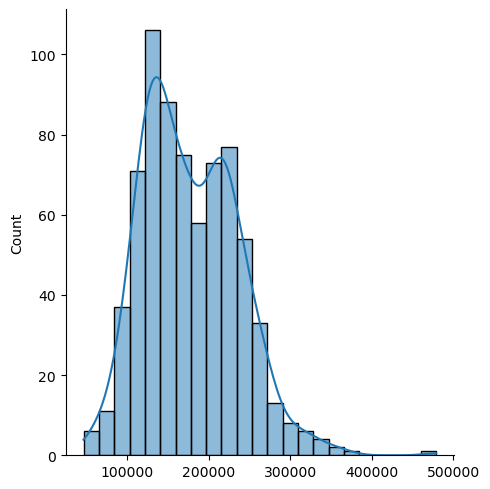

In [50]:
# check the y_pred, it follow the Normal Distribution or not 
sns.displot(y_pred,kde=True)

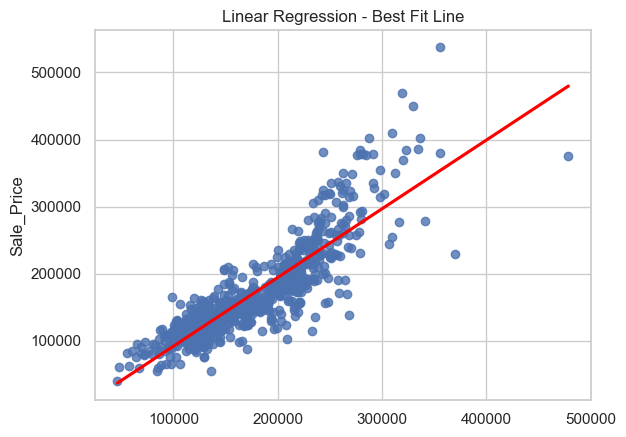

In [51]:
#check the linear dependent variabels on y_pred and y_test
sns.set(style="whitegrid")
sns.regplot(x=y_pred, y=y_test, ci=None, line_kws={'color': 'red'})

plt.title('Linear Regression - Best Fit Line')
plt.show()

### Gauss_markov assumption

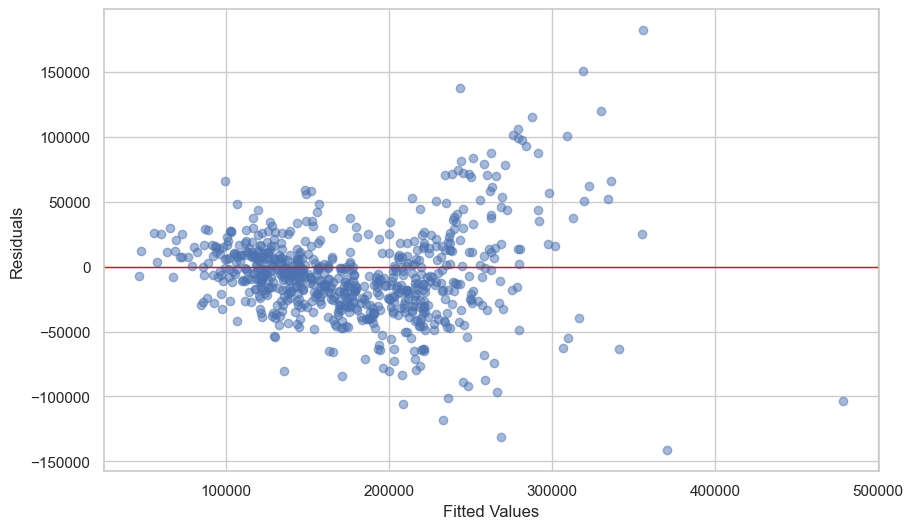

In [52]:
# Check that residuals vs. fitted values plot for a linear regression model. This type of plot is useful for examining the relationship between the predicted values (fitted values) and the residuals
residuals = y_test-y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [53]:
#check the assumption of homoscedasticity in the model

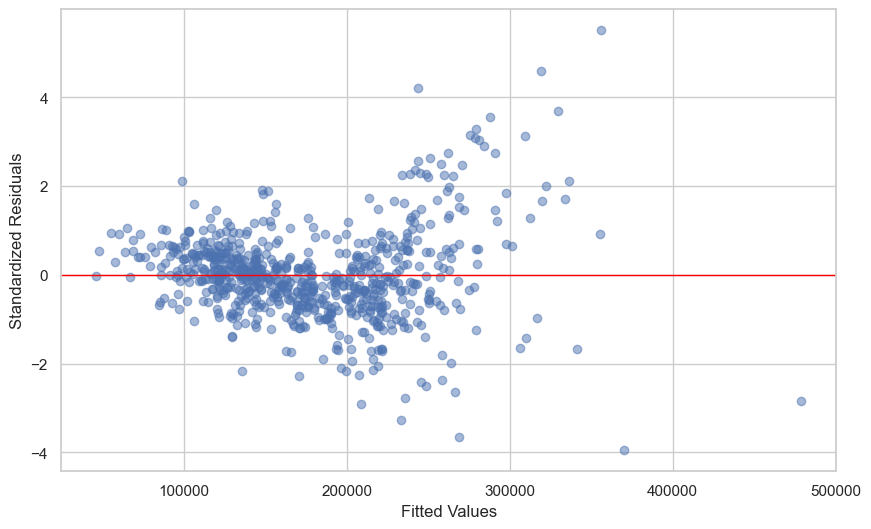

In [54]:
# Calculate standardized residuals manually(homocedasity)
std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Plot standardized residuals versus fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-', linewidth=1)
# plt.title('Standardized Residuals vs Fitted Values (Training Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()



In [55]:
# Normality of Errors

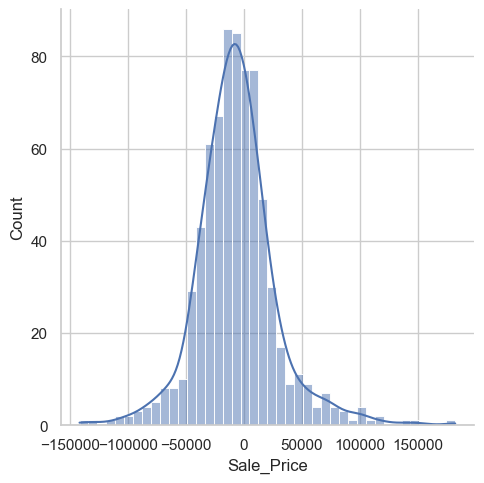

In [56]:
sns.displot(residuals,kde=True)

In [57]:
statistic, p_value = shapiro(residuals)

print(f"Shapiro-Wilk value: {statistic}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value > alpha:
    print("The sample appears to be normally distributed (fail to reject the null hypothesis)")
else:
    print("The sample does not appear to be normally distributed (reject the null hypothesis)")


Shapiro-Wilk value: 0.9466150403022766
P-value: 1.7144818237571527e-15
The sample does not appear to be normally distributed (reject the null hypothesis)


In [58]:
#Find the Cook's distance values which are measures observation on the fitted values in a linear regression model 

In [59]:
mse = np.mean(residuals**2)
cook_distance_values = (residuals**2) / (2 * mse) * (np.sum(residuals**2) / len(x_train))

print(cook_distance_values)


212     1.183654e+09
1385    1.154151e+08
97      1.417735e+07
1706    5.470917e+07
2166    4.401089e+07
            ...     
885     3.248597e+09
357     3.733851e+08
1730    4.812354e+08
660     1.193583e+08
1826    2.579071e+08
Name: Sale_Price, Length: 724, dtype: float64


In [60]:
#Durbin-Watson statistic to test for autocorrelation in the residuals of a regression model 

In [61]:
durbin_watson_statistic = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)

print(f'Durbin-Watson statistic: {durbin_watson_statistic}')

if durbin_watson_statistic < 1.5:
    print('+ve autocorrelation present.')
elif durbin_watson_statistic > 2.5:
    print('-ve autocorrelation present.')
else:
    print('No significant autocorrelation detected.')


Durbin-Watson statistic: 1.9830686415990952
No significant autocorrelation detected.


In [62]:
#Check the accuracy of the model

In [63]:
#Residual Standard Error (RSE):
rse = np.sqrt(np.sum((y_test - y_pred)**2) / (len(y_test) - 2))
print("The Residual Standard Error is : ", rse)

The Residual Standard Error is :  34834.494562057844


In [64]:
#Mean Absolute Error (MAE):
mae = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error is : ", mae)

Mean Absolute Error is :  25090.647314649847


In [65]:
#Root Mean Squared Error (RMSE):
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error is : ", rmse)

Mean Absolute Error is :  34786.34734545732
